In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Logo-generating module
import anylogo

%matplotlib inline
plt.ion()

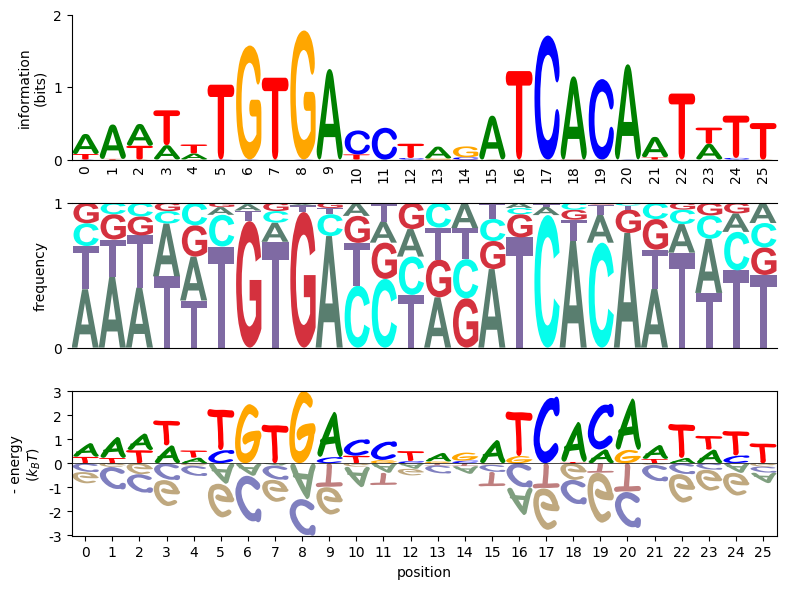

In [10]:
fig = plt.figure(figsize=[8,6])

# Load energy matrix
energy_mat = pd.read_csv('crp_fullwt.26.txt',delim_whitespace=True)

# Plot information logo
ax = fig.add_subplot(3,1,1)
anylogo.Logo(mat=energy_mat, mat_type='energy_mat', logo_type='info_logo').draw()

# Plot frequency logo
ax = fig.add_subplot(3,1,2)
anylogo.Logo(mat=energy_mat, mat_type='energy_mat', font_name='Arial Bold',
             logo_type='freq_logo', color_scheme='random', logo_style='rails', stack_order='small_on_top').draw()

# Plot energy logo
ax = fig.add_subplot(3,1,3)
anylogo.Logo(mat=energy_mat, mat_type='energy_mat', 
             logo_type='energy_logo', neg_flip=True, 
             logo_style='everything', font_name='Comic Sans MS Bold').draw()

plt.tight_layout()